# Ch6.3
## Jena weather dataset
### data loading

In [15]:
import os
dataDir = '/home/chen/LiChiChang/2020SpringThesis/dataset/jenaClimate'
fname = os.path.join(dataDir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print("show the header:",header)
print("length of this dataset: ",len(lines))

show the header: ['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
length of this dataset:  420551


### data parsing

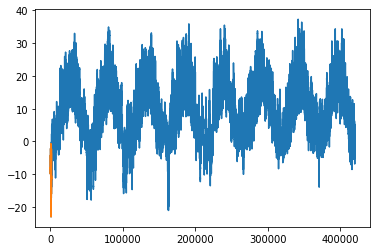

In [21]:
import numpy as np
floatData = np.zeros((len(lines),len(header) - 1))      #get rid of the date
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]   #get rid of the date
    floatData[i, :] = values

from matplotlib import pyplot as plt
temp = floatData[:,1]                                   #<1> temperature (indegrees Celsius)
plt.plot(range(len(temp)),temp)


each data is recorded in every 10 mins

so the following graph is the temp change in 10 days

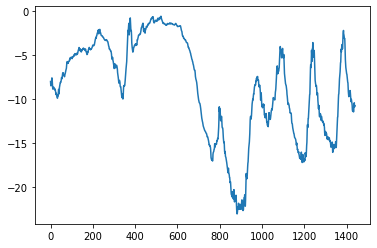

In [22]:
plt.plot(range(1440), temp[:1440])

* data: the original dataset
* lookback: how mway timesteps back the input data should go.


In [ ]:
def generator(data, lookback, delay):